<a href="https://colab.research.google.com/github/lorenzrossi/AMD-ComicsFaces/blob/main/AMD_models_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from os import listdir
import pandas as pd
# Basic packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

# Image preprocessing
import pathlib
import PIL
import PIL.Image
import cv2

# Neural Networks
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, callbacks, regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, Activation
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import binary_crossentropy
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Cross Validation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss

tfk = tf.keras
tf.keras.backend.set_floatx("float64")


from google.colab import drive
drive.mount('/content/drive')

dir = '/content/drive/MyDrive/ComicsFaces'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/X.pickle','rb'))
y = pickle.load(open('/content/drive/MyDrive/ComicsFaces/Pickles/y.pickle','rb'))

pics_classes = ['comics','faces']

images_to_plot = 8

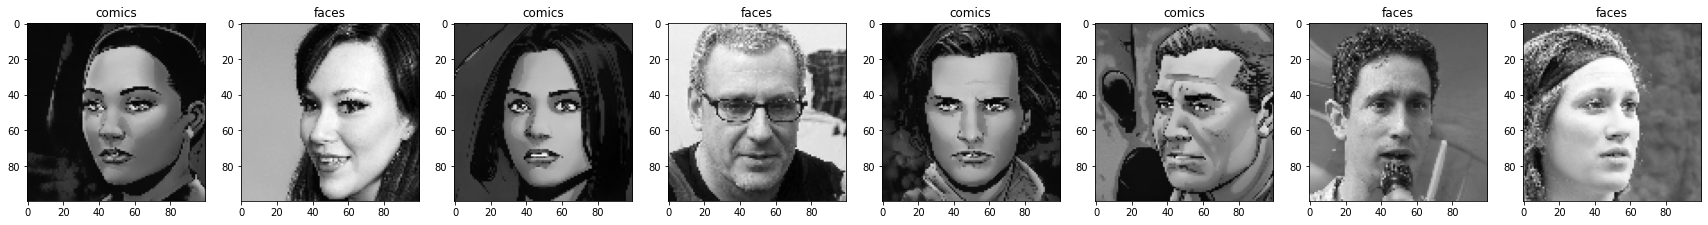

In [4]:
f, ax = plt.subplots(1, images_to_plot)
f.set_size_inches(30, 20)

gray_channel = 0

for i in range(images_to_plot):
  gray_image = X[i][:, :, gray_channel]
  ax[i].imshow(gray_image, cmap = "gray")
  numeric_label = y[i]
  ax[i].set_title(pics_classes[numeric_label])

In [5]:
number_of_classes = len(pics_classes)

In [6]:
x_size, img_dim = X.shape[0], X.shape[1]

# rescale in [0,1]
X = tf.cast(X, tf.float32) / 255.0

# one hot encoding
depth = 1
y = tf.reshape(tf.one_hot(y, depth), shape = [x_size, depth])

In [7]:
# Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [8]:
# Hyperparameters
epoch = 40 # n of epochs
batch = 128 # batch size

# Defining the loss
loss = keras.losses.BinaryCrossentropy(from_logits = True)

# Defining the optimizer(s)
op_1 = Adam()
op_2 = SGD(learning_rate=0.01, momentum=0.9, decay=0.01/50)
op_3 = RMSprop(learning_rate=1e-3)

In [9]:
# Defining plots
legend_size = 14

def performance_plot(history):
    plt.figure(figsize=(20,8))

    # Loss plots
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','test'], fontsize = legend_size)

    # Accuracy plots
    plt.subplot(1,2,2)
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.ylabel('accuracy', size = 12)
    plt.xlabel('epoch', size = 12)
    plt.legend(['train','val'], fontsize = legend_size)

    plt.show()

# TRAINING MODEL 1

In [10]:
model1 = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
        layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
        layers.MaxPooling2D(pool_size = (2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, use_bias=False, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation = 'sigmoid')
        ])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      288       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense (Dense)               (None, 128)               10240000  
                                                        

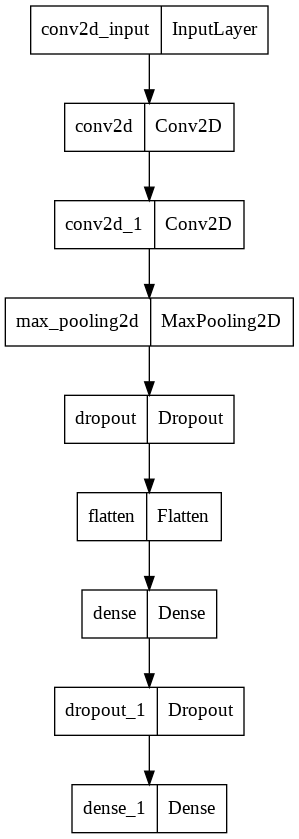

In [11]:
keras.utils.plot_model(model1, 'model.png')

Epoch 1/40


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


100/100 [==============================] - 14s 39ms/step - loss: 0.1148 - binary_accuracy: 0.9616 - val_loss: 0.0075 - val_binary_accuracy: 0.9978
Epoch 2/40
100/100 [==============================] - 4s 36ms/step - loss: 0.0084 - binary_accuracy: 0.9978 - val_loss: 0.0027 - val_binary_accuracy: 0.9991
Epoch 3/40
100/100 [==============================] - 4s 37ms/step - loss: 0.0023 - binary_accuracy: 0.9995 - val_loss: 0.0019 - val_binary_accuracy: 0.9994
Epoch 4/40
100/100 [==============================] - 4s 37ms/step - loss: 0.0019 - binary_accuracy: 0.9997 - val_loss: 0.0052 - val_binary_accuracy: 0.9978
Epoch 5/40
100/100 [==============================] - 4s 37ms/step - loss: 0.0013 - binary_accuracy: 0.9997 - val_loss: 0.0032 - val_binary_accuracy: 0.9984
Epoch 6/40
100/100 [==============================] - 4s 37ms/step - loss: 5.0601e-04 - binary_accuracy: 1.0000 - val_loss: 0.0012 - val_binary_accuracy: 0.9994
Epoch 7/40
100/100 [==============================] - 4s 36ms/st

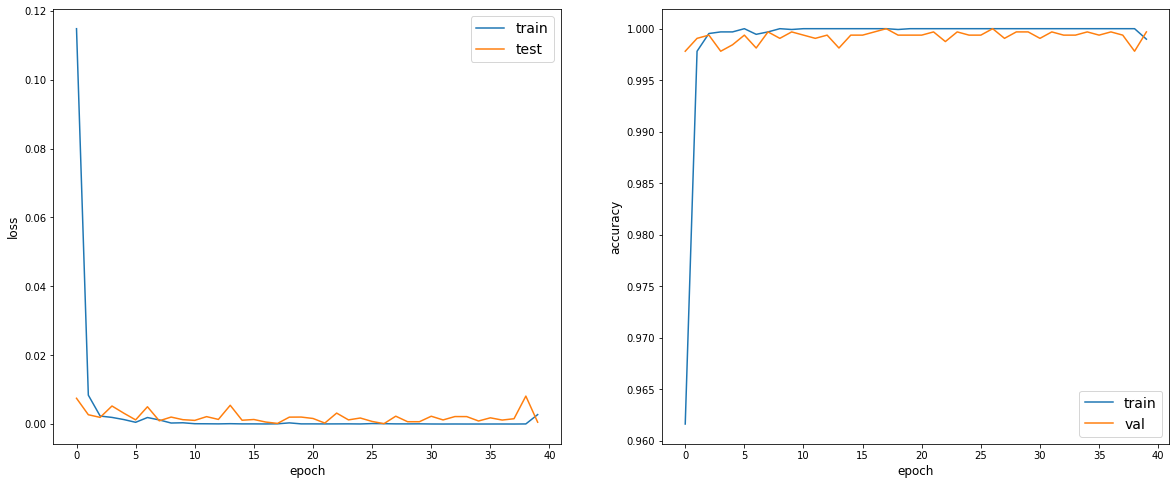

125/125 [==============================] - 1s 6ms/step - loss: 0.0052 - binary_accuracy: 0.9985
test loss, test acc: [0.005208146614017778, 0.9985]


In [12]:
# compiling the model
model1.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model1.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_1 = model1.evaluate(X_test, y_test)
print("test loss, test acc:", result_1)

# TRAINING MODEL 2

In [13]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 50, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

Epoch 1/40
100/100 [==============================] - 5s 47ms/step - loss: 0.2192 - binary_accuracy: 0.9282 - val_loss: 0.0130 - val_binary_accuracy: 0.9947
Epoch 2/40
100/100 [==============================] - 4s 45ms/step - loss: 0.0112 - binary_accuracy: 0.9969 - val_loss: 0.0018 - val_binary_accuracy: 0.9994
Epoch 3/40
100/100 [==============================] - 4s 45ms/step - loss: 0.0050 - binary_accuracy: 0.9987 - val_loss: 0.0021 - val_binary_accuracy: 0.9991
Epoch 4/40
100/100 [==============================] - 4s 45ms/step - loss: 0.0035 - binary_accuracy: 0.9992 - val_loss: 0.0012 - val_binary_accuracy: 0.9997
Epoch 5/40
100/100 [==============================] - 4s 45ms/step - loss: 0.0039 - binary_accuracy: 0.9987 - val_loss: 0.0046 - val_binary_accuracy: 0.9981
Epoch 6/40
100/100 [==============================] - 4s 45ms/step - loss: 0.0029 - binary_accuracy: 0.9991 - val_loss: 0.0010 - val_binary_accuracy: 0.9994
Epoch 7/40
100/100 [==============================] - 4s 4

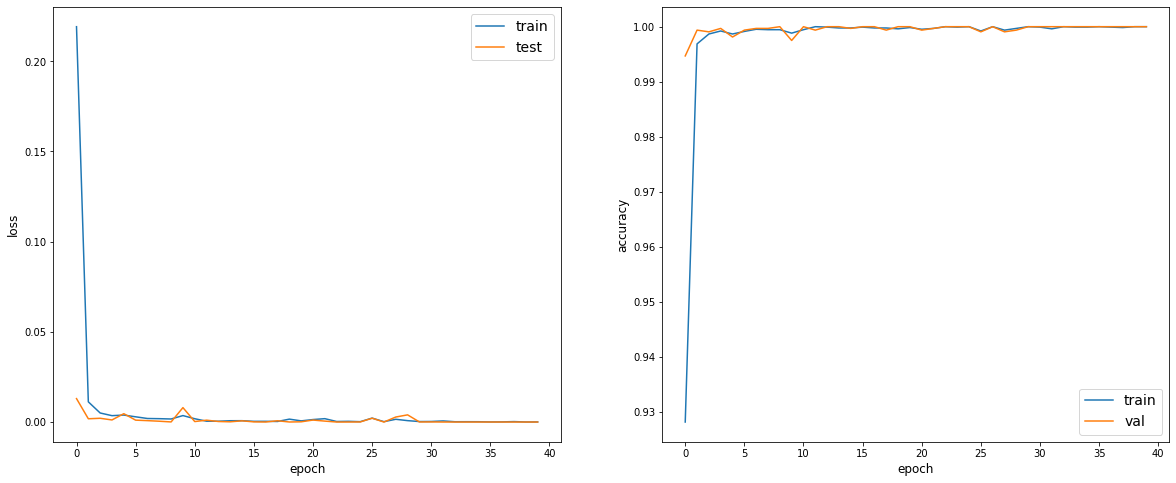

125/125 [==============================] - 1s 7ms/step - loss: 0.0026 - binary_accuracy: 0.9992
test loss, test acc: [0.0026378178588216733, 0.99925]


In [14]:
# compiling the model
model2.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model2.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_2 = model2.evaluate(X_test, y_test)
print("test loss, test acc:", result_2)

# TRAINING MODEL 3

In [15]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 50, 50, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

Epoch 1/40
100/100 [==============================] - 6s 53ms/step - loss: 0.1524 - binary_accuracy: 0.9304 - val_loss: 0.0110 - val_binary_accuracy: 0.9956
Epoch 2/40
100/100 [==============================] - 5s 51ms/step - loss: 0.0170 - binary_accuracy: 0.9947 - val_loss: 0.0116 - val_binary_accuracy: 0.9959
Epoch 3/40
100/100 [==============================] - 5s 51ms/step - loss: 0.0128 - binary_accuracy: 0.9965 - val_loss: 0.0112 - val_binary_accuracy: 0.9950
Epoch 4/40
100/100 [==============================] - 5s 51ms/step - loss: 0.0093 - binary_accuracy: 0.9973 - val_loss: 0.0050 - val_binary_accuracy: 0.9984
Epoch 5/40
100/100 [==============================] - 5s 51ms/step - loss: 0.0087 - binary_accuracy: 0.9967 - val_loss: 0.0124 - val_binary_accuracy: 0.9950
Epoch 6/40
100/100 [==============================] - 5s 51ms/step - loss: 0.0078 - binary_accuracy: 0.9975 - val_loss: 0.0043 - val_binary_accuracy: 0.9988
Epoch 7/40
100/100 [==============================] - 5s 5

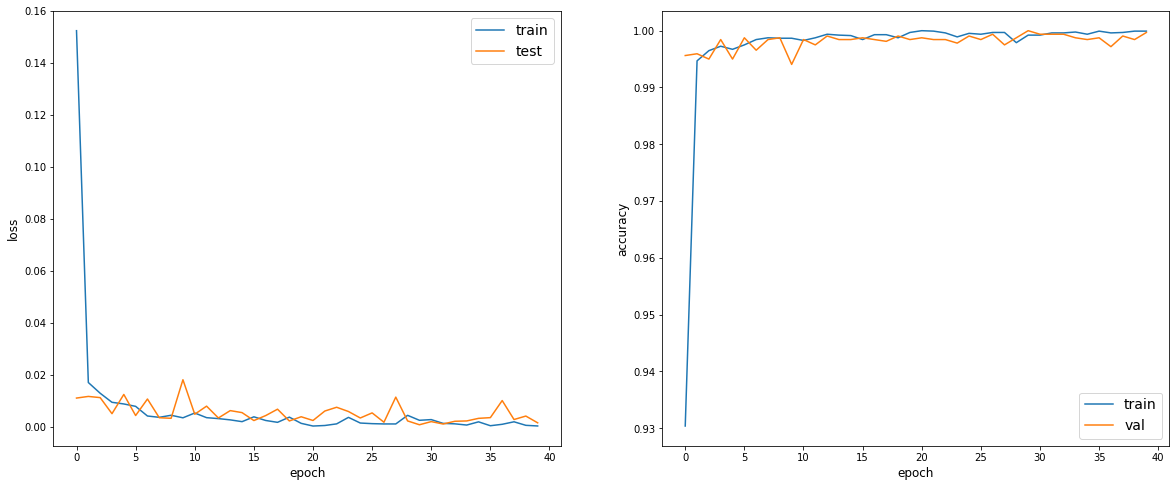

125/125 [==============================] - 1s 7ms/step - loss: 0.0027 - binary_accuracy: 0.9990
test loss, test acc: [0.0026688481092055133, 0.999]


In [16]:
# compiling the model
model3.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model3.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_3 = model3.evaluate(X_test, y_test)
print("test loss, test acc:", result_3)

# TRAINING MODEL 4

In [17]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      288       
                                                                 
 conv2d_10 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 50, 50, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

Epoch 1/40
100/100 [==============================] - 7s 60ms/step - loss: 0.2355 - binary_accuracy: 0.8861 - val_loss: 0.0036 - val_binary_accuracy: 0.9991
Epoch 2/40
100/100 [==============================] - 6s 58ms/step - loss: 0.0154 - binary_accuracy: 0.9955 - val_loss: 0.0027 - val_binary_accuracy: 0.9994
Epoch 3/40
100/100 [==============================] - 6s 57ms/step - loss: 0.0097 - binary_accuracy: 0.9970 - val_loss: 9.7617e-04 - val_binary_accuracy: 1.0000
Epoch 4/40
100/100 [==============================] - 6s 58ms/step - loss: 0.0052 - binary_accuracy: 0.9980 - val_loss: 0.0012 - val_binary_accuracy: 1.0000
Epoch 5/40
100/100 [==============================] - 6s 58ms/step - loss: 0.0066 - binary_accuracy: 0.9980 - val_loss: 6.0485e-04 - val_binary_accuracy: 0.9997
Epoch 6/40
100/100 [==============================] - 6s 57ms/step - loss: 0.0051 - binary_accuracy: 0.9986 - val_loss: 9.2308e-04 - val_binary_accuracy: 0.9997
Epoch 7/40
100/100 [==========================

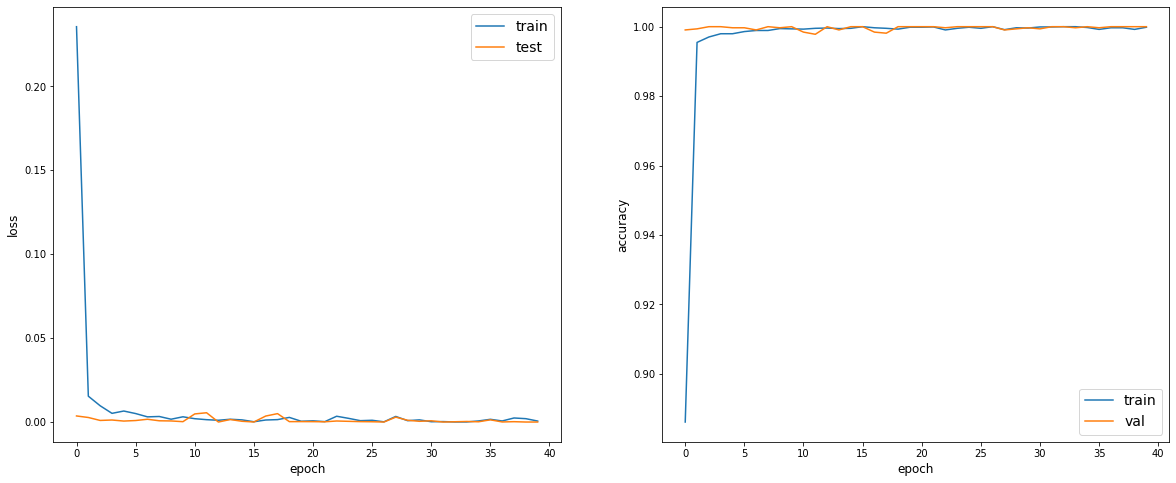

125/125 [==============================] - 1s 8ms/step - loss: 1.7215e-05 - binary_accuracy: 1.0000
test loss, test acc: [1.7215422874219345e-05, 1.0]


In [18]:
# compiling the model
model4.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model4.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_4 = model4.evaluate(X_test, y_test)
print("test loss, test acc:", result_4)

# TRAINING MODEL 5

In [19]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

Epoch 1/40
100/100 [==============================] - 7s 61ms/step - loss: 0.3980 - binary_accuracy: 0.8075 - val_loss: 0.0854 - val_binary_accuracy: 0.9725
Epoch 2/40
100/100 [==============================] - 6s 59ms/step - loss: 0.0588 - binary_accuracy: 0.9797 - val_loss: 0.0228 - val_binary_accuracy: 0.9956
Epoch 3/40
100/100 [==============================] - 6s 59ms/step - loss: 0.0123 - binary_accuracy: 0.9961 - val_loss: 0.0037 - val_binary_accuracy: 0.9991
Epoch 4/40
100/100 [==============================] - 6s 59ms/step - loss: 0.0062 - binary_accuracy: 0.9981 - val_loss: 0.0119 - val_binary_accuracy: 0.9953
Epoch 5/40
100/100 [==============================] - 6s 59ms/step - loss: 0.0045 - binary_accuracy: 0.9986 - val_loss: 0.0016 - val_binary_accuracy: 0.9997
Epoch 6/40
100/100 [==============================] - 6s 59ms/step - loss: 0.0069 - binary_accuracy: 0.9979 - val_loss: 0.0040 - val_binary_accuracy: 0.9991
Epoch 7/40
100/100 [==============================] - 6s 5

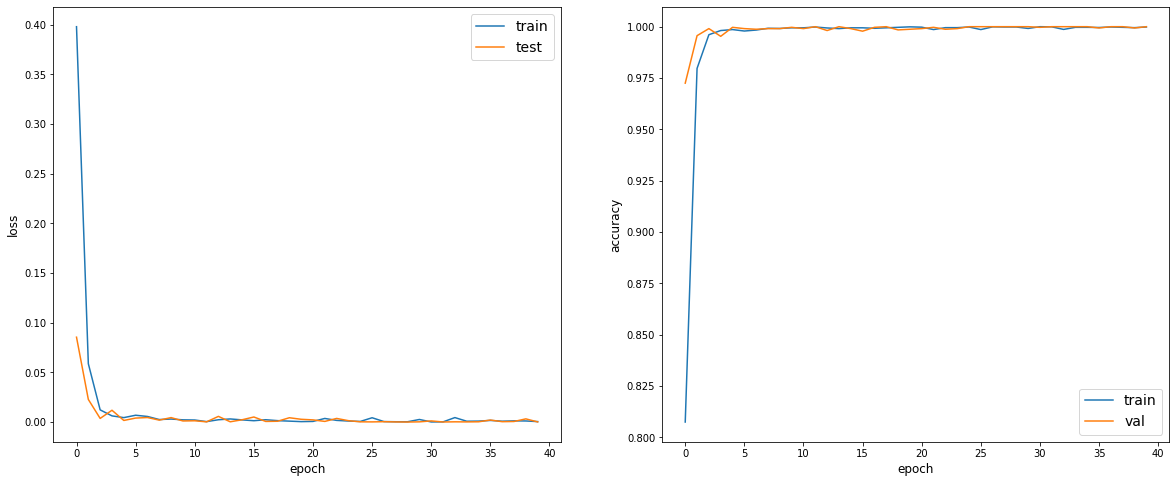

125/125 [==============================] - 1s 8ms/step - loss: 0.0016 - binary_accuracy: 0.9998
test loss, test acc: [0.001599303894161032, 0.99975]


In [20]:
# compiling the model
model5.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model5.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_5 = model5.evaluate(X_test, y_test)
print("test loss, test acc:", result_5)

# TRAINING MODEL 6

In [21]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (100, 100, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 100, 100, 32)      288       
                                                                 
 conv2d_21 (Conv2D)          (None, 100, 100, 32)      9216      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 64)        18432     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                 

Epoch 1/40
100/100 [==============================] - 7s 62ms/step - loss: 0.1852 - binary_accuracy: 0.9077 - val_loss: 0.0116 - val_binary_accuracy: 0.9953
Epoch 2/40
100/100 [==============================] - 6s 60ms/step - loss: 0.0180 - binary_accuracy: 0.9941 - val_loss: 0.0069 - val_binary_accuracy: 0.9978
Epoch 3/40
100/100 [==============================] - 6s 60ms/step - loss: 0.0083 - binary_accuracy: 0.9970 - val_loss: 0.0038 - val_binary_accuracy: 0.9981
Epoch 4/40
100/100 [==============================] - 6s 60ms/step - loss: 0.0060 - binary_accuracy: 0.9983 - val_loss: 0.0045 - val_binary_accuracy: 0.9978
Epoch 5/40
100/100 [==============================] - 6s 60ms/step - loss: 0.0065 - binary_accuracy: 0.9981 - val_loss: 0.0070 - val_binary_accuracy: 0.9972
Epoch 6/40
100/100 [==============================] - 6s 60ms/step - loss: 0.0041 - binary_accuracy: 0.9980 - val_loss: 0.0121 - val_binary_accuracy: 0.9953
Epoch 7/40
100/100 [==============================] - 6s 6

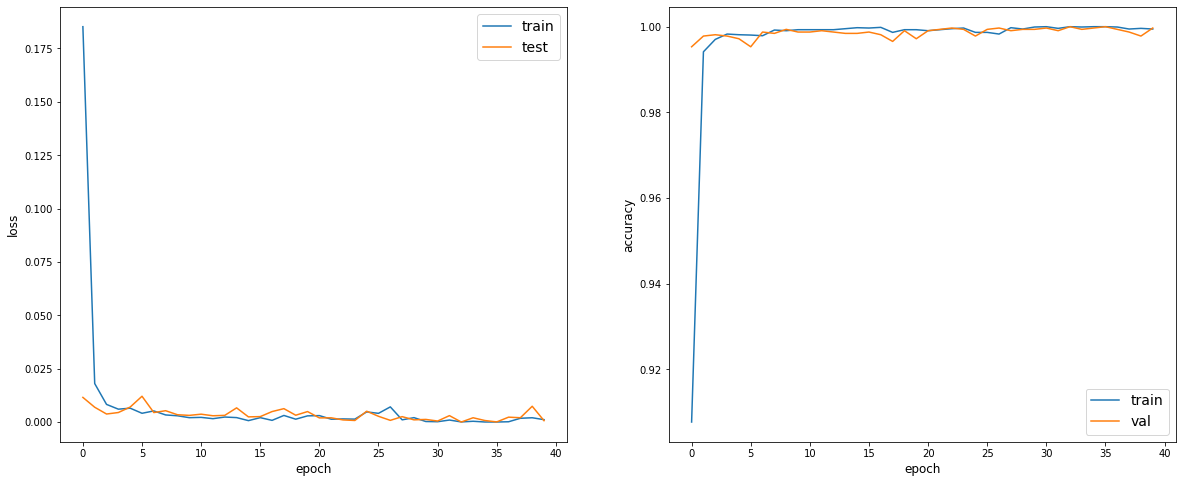

125/125 [==============================] - 1s 8ms/step - loss: 0.0019 - binary_accuracy: 0.9992
test loss, test acc: [0.001902198202536775, 0.99925]


In [22]:
# compiling the model
model6.compile(optimizer = op_1, loss=loss, metrics=['binary_accuracy'])

history = model6.fit(X_train, y_train, epochs = epoch, batch_size = batch, verbose = 1, validation_split = 0.2)

performance_plot(history)

result_6 = model6.evaluate(X_test, y_test)
print("test loss, test acc:", result_6)